In [33]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

categories = [
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'alt.atheism',
    'soc.religion.christian'
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [34]:
df = pd.DataFrame(dataset.data, columns=["corpus"])
df

,corpus
0,"\nThey tried their best not to show it, believ..."
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...
2,\n[deletia- and so on]\n\nI seem to have been ...
3,"Excuse the sheer newbieness of this post, but ..."
4,==============================================...
...,...
3446,"\n Or, with no dictionary available, they cou..."
3447,\n\nSorry to disappoint you but the Red Wings ...
3448,\n: Can anyone tell me where to find a MPEG vi...
3449,\n


In [35]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
        # return text in lowercase and stripped of whitespaces
    text = text.lower().strip()
    return text

In [36]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords = True))

In [37]:
df

,corpus,cleaned
0,"\nThey tried their best not to show it, believ...",tried best show believe im surprised couldnt f...
1,\nStankiewicz? I doubt it.\n\nKoufax was one ...,stankiewicz doubt koufax one two jewish hofs h...
2,\n[deletia- and so on]\n\nI seem to have been ...,deletia seem rather unclear asking please show...
3,"Excuse the sheer newbieness of this post, but ...",excuse sheer newbieness post looking decent pa...
4,==============================================...,
...,...,...
3446,"\n Or, with no dictionary available, they cou...",dictionary available could gain first hand kno...
3447,\n\nSorry to disappoint you but the Red Wings ...,sorry disappoint red wings earned victoryeasil...
3448,\n: Can anyone tell me where to find a MPEG vi...,anyone tell find mpeg viewer either dos window...
3449,\n,


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
Features = cv.fit_transform(df['cleaned']).toarray()
print(Features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

num_clusters = 3  
kmeans_euclidean = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=0)

kmeans_euclidean.fit(Features)
kmeans_cosine.fit(Features)

cluster_labels_euclidean = kmeans_euclidean.labels_

distances_cosine = cosine_distances(Features, kmeans_cosine.cluster_centers_)

closest_cluster_cosine = np.argmin(distances_cosine, axis=1)

/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/farrelmanazilin/tomatopotato/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
pca = PCA(n_components=2, random_state=42) 
pca_vecs = pca.fit_transform(Features) 
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [41]:
df['x0'] = x0
df['x1'] = x1
df['euclidean'] = kmeans_euclidean.labels_
df['cosine'] = closest_cluster_cosine
print(df)

                                                 corpus   
0     \nThey tried their best not to show it, believ...  \
1     \nStankiewicz?  I doubt it.\n\nKoufax was one ...   
2     \n[deletia- and so on]\n\nI seem to have been ...   
3     Excuse the sheer newbieness of this post, but ...   
4     ==============================================...   
...                                                 ...   
3446  \n  Or, with no dictionary available, they cou...   
3447  \n\nSorry to disappoint you but the Red Wings ...   
3448  \n: Can anyone tell me where to find a MPEG vi...   
3449                                                 \n   
3450  \nHey Valentine, I don't see Boston with any w...   

                                                cleaned        x0        x1   
0     tried best show believe im surprised couldnt f... -0.953340 -1.169113  \
1     stankiewicz doubt koufax one two jewish hofs h... -0.957197 -0.629680   
2     deletia seem rather unclear asking please show..

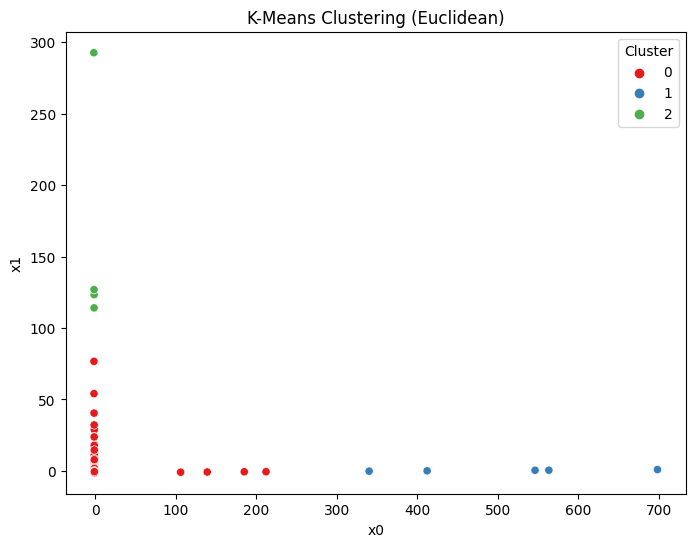

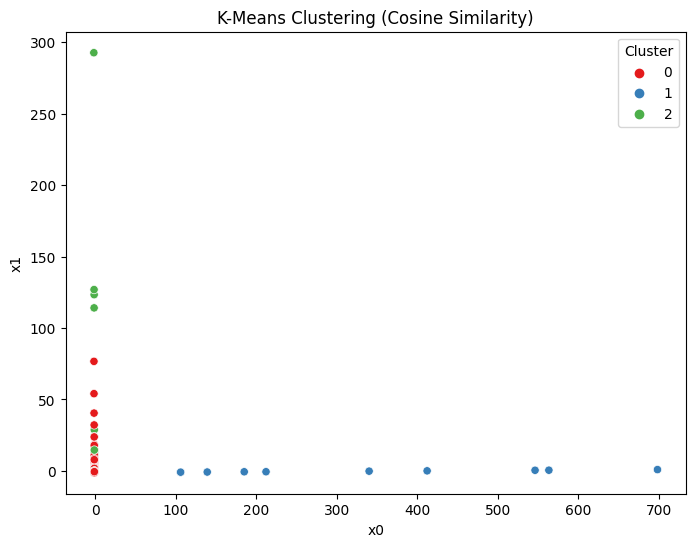

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Euclidean
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x0', y='x1', hue=cluster_labels_euclidean, palette='Set1')
plt.title('K-Means Clustering (Euclidean)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Visualisasi Cosine Similarity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x0', y='x1', hue=closest_cluster_cosine, palette='Set1')
plt.title('K-Means Clustering (Cosine Similarity)')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [43]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Menghitung DBI dan Silhouette Score untuk Euclidean
dbi_euclidean = davies_bouldin_score(Features, cluster_labels_euclidean)
silhouette_euclidean = silhouette_score(Features, cluster_labels_euclidean)

print("DBI Score (Euclidean):", dbi_euclidean)
print("Silhouette Score (Euclidean):", silhouette_euclidean)


DBI Score (Euclidean): 0.7884566301518148
Silhouette Score (Euclidean): 0.9293663677018371


In [44]:
# Menghitung DBI dan Silhouette Score untuk Cosine Similarity
dbi_cosine = davies_bouldin_score(Features, closest_cluster_cosine)
silhouette_cosine = silhouette_score(Features, closest_cluster_cosine)

print("DBI Score (Cosine Similarity):", dbi_cosine)
print("Silhouette Score (Cosine Similarity):", silhouette_cosine)

DBI Score (Cosine Similarity): 4.257461022888562
Silhouette Score (Cosine Similarity): 0.07269020138108004
